In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

In [5]:

df= pd.read_csv('insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(df ,
                   x  = 'bmi',
                   marginal= 'box', 
                   color_discrete_sequence = ['red'],
                   title = "Distributon of BMI  (body max index)")
fig.update_layout(bargap= 0.1)
fig.show()

In [15]:
fig = px.histogram(df , x = 'expenses'  ,marginal = 'box' , color = 'smoker' , color_discrete_sequence=['green' , 'grey'] , title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
px.histogram(df , x='smoker' , color = 'sex' , title = 'smoker')

In [19]:
fig = px.scatter(df , x = 'bmi' , y = 'expenses' , color = 'smoker' , opacity= 0.8 , hover_data= ['sex'], title='BMI vs EXPENSE')
fig.update_traces(marker_size=5)
fig.show()

In [21]:
df.expenses.corr(df.bmi)

0.198576255018932

In [25]:
smoke_value = {'no' : 0 , 'yes': 1}
smoke_numeric = df.smoker.map(smoke_value)
df.expenses.corr(smoke_numeric)

0.7872514298985536

Text(0.5, 1.0, 'Correlation matrix')

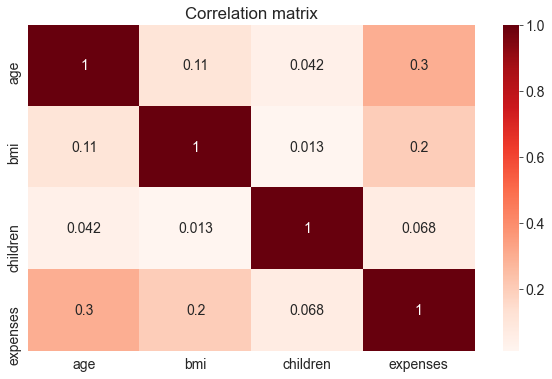

In [26]:
sns.heatmap(df.corr() , cmap="Reds" , annot = True)
plt.title("Correlation matrix")

<AxesSubplot:title={'center':'age vs charges'}, xlabel='age', ylabel='expenses'>

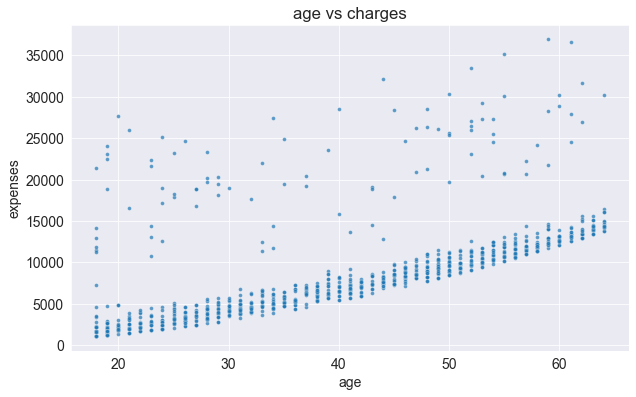

In [29]:
non_smoker_df = df[df.smoker == 'no']
plt.title('age vs charges')
sns.scatterplot(data= non_smoker_df , x= 'age' , y = 'expenses' , alpha =0.7 , s = 15)

In [ ]:
def estimate_expenses(age, w,b):
    return w * age +b

In [32]:
def try_paramaters(w ,b):
    ages = non_smoker_df.age
    target = non_smoker_df.expenses
    
    estimate_expenses = estimate_expenses(ages, w, b)
    
    plt.plot(ages, estimate_expenses , 'r' , alpha = 0.9)
    plt.scatter(ages ,target , s = 8 , alpha = 0.8)
    plt.xlabel('age')
    plt.ylabel('expenses')
    plt.legend(['estimated' ,  'actual'])

In [31]:
try_paramaters(60 ,200)

UnboundLocalError: local variable 'estimate_expenses' referenced before assignment